This part we can analyse how many satistical significant data do we have for analysis. 


In [1]:
import numpy as np
import pandas as pd 
import os
import shutil


In [2]:
# Create directory, if directory exists remove and create one 

def create_directory(directory_path):
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path) 
        os.mkdir(directory_path)
    else:
        os.mkdir(directory_path)

In [3]:
#moving files from one folder to other,     
def move_allfiles (src,dst):
    if os.path.exists(src):
        files = os.listdir(src) 
        for f in files:
            shutil.copyfile(src+f,dst+f)

In [4]:
#moving list of files from one folder to other,
def move_listfiles (src,dst,img_list):
    if os.path.exists(src):
        files = img_list
        for f in files:
            shutil.copyfile(src+f,dst+f)

In [5]:
#reading the data
df=pd.read_csv("Data_Entry_2017.csv") 

In [6]:
#renaming the columns names
df.rename(columns={'Image Index':'img_index','Finding Labels':'labels','Follow-up #':'follow_up','Patient ID':'pa_id',
                   'Patient Age':'pa_age','Patient Gender':'pa_gender','View Position':'view_position'}, inplace=True)

In [7]:
df.columns

Index(['img_index', 'labels', 'follow_up', 'pa_id', 'pa_age', 'pa_gender',
       'view_position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]'],
      dtype='object')

In [9]:
#convert the files in train_val_list.txt to a python list 

train_val_list= open('/Users/neeharikasinha/Documents/datascience-course/Capstone1/Chestxray-cardiomegaly_final/train_val_list.txt').read().split()
train_val_list[1:3]

['00000001_001.png', '00000001_002.png']

In [10]:
len(train_val_list)

86524

In [12]:
#Selecting the images under train_val_list from Data_Entry_2017.csv file

df_train_img = df[df.img_index.isin(train_val_list)]

In [75]:
df_train_img.head()
#following are the images to be trained

,img_index,labels,follow_up,pa_id,pa_age,pa_gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],marker
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,2
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,2
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,2
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,1
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168,NaN


In [100]:
#checking images with various labels
print(df_train_img['labels'].unique()[0:10])

['Cardiomegaly' 'Cardiomegaly|Emphysema' 'Cardiomegaly|Effusion'
 'No Finding' 'Mass|Nodule' 'Infiltration' 'Effusion|Infiltration'
 'Nodule' 'Emphysema' 'Effusion']


In [77]:
df_train_img['labels'].empty 

False

Its good that there are no empty data points.
Looking at the unique labels we can say that Cardiomegaly is not found to be a unique deceases proven in a Chest Xray.It is accompanied with other deceases. 

We will now select those images which has been marked as "train_val" set from the train_val_list.txt file provide in the data. Will then identify few images as have alook how a normal or cardiomegaly images look like. Although it doesnt have any sigificance on the training process.


In [90]:

#assign 1 for 'No Finding' and 2 for 'Cardiomegaly'
df_train_img.loc[df_train_img.labels.str.contains('No Finding'), 'marker'] = '1'

df_train_img.loc[df_train_img.labels.str.contains('Cardiomegaly'), 'marker'] = '2'


/Users/neeharikasinha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [101]:
df_train_img.head(3)

,img_index,labels,follow_up,pa_id,pa_age,pa_gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],marker
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,2
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,2
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,2


In [92]:
df_train_img.describe()

,follow_up,pa_id,pa_age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,86524.000000,86524.000000,86524.000000,86524.000000,86524.000000,86524.000000,86524.000000
mean,5.096621,13795.359415,46.870071,2641.784129,2505.106121,0.155384,0.155384
std,8.656941,8261.548258,16.835434,337.139196,403.957467,0.015615,0.015615
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,6773.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,2.000000,13352.500000,49.000000,2520.000000,2544.000000,0.143000,0.143000
75%,6.000000,20185.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,108.000000,30801.000000,413.000000,3550.000000,3166.000000,0.198800,0.198800


No Findings are realted to those images where the patient is checking after the treatment as we can see that we have various Xray images with the same patient id

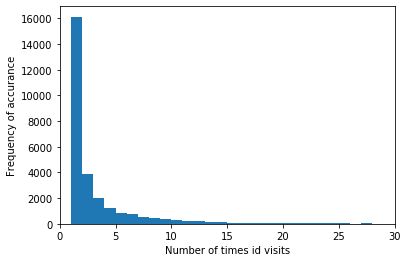

In [94]:
import matplotlib.pyplot as plt
repeat_id=df_train_img.groupby('pa_id').size()
plt.hist(repeat_id, bins=np.arange(repeat_id.min(), repeat_id.max()+1))
 
plt.xlabel('Number of times id visits')
plt.ylabel('Frequency of accurance')
plt.xlim(0,30)
plt.show()

The result show that the frequency of visits or the followup is mostly 5. There are some long lasting visits too with maximum of 27

In [95]:
df_normal=df_train_img[df_train_img['marker'] == '1']

In [84]:
df_cardiomegaly=df_train_img[df_train_img['marker'] == '2']

In [85]:
df_normal.head()

,img_index,labels,follow_up,pa_id,pa_age,pa_gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],marker
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,1
13,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,1
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,1
15,00000005_002.png,No Finding,2,5,69,F,AP,2500,2048,0.168,0.168,1
16,00000005_003.png,No Finding,3,5,69,F,PA,2992,2991,0.143,0.143,1


In [86]:
df_cardiomegaly.head()

,img_index,labels,follow_up,pa_id,pa_age,pa_gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],marker
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,2
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,2
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,2
23,00000008_000.png,Cardiomegaly,0,8,69,F,PA,2048,2500,0.171,0.171,2
175,00000033_000.png,Atelectasis|Cardiomegaly|Fibrosis,0,33,72,F,PA,2992,2745,0.143,0.143,2


In [87]:
#number of images which do not come under normal or cardiomegaly
print('Number of images which do not come under normal or cardiomegaly:',len(df_train_img)-(len(df_normal)+len(df_cardiomegaly)))

Number of images which do not come under normal or cardiomegaly: 34317


In [88]:
#number of raw images having deceases
print('Number of raw images being analysed:',len(df_normal)+len(df_cardiomegaly))

Number of raw images being analysed: 52207


In [102]:
#Total number of images under training data set 
print('Total number of images in train data:', len(train_val_list))

Total number of images in train data: 86524


In [103]:
#Fraction of data in normal category
print("Fraction of normal images:",(len(df_normal)/len(train_val_list))*100)

Fraction of normal images: 58.365309047200775


In [104]:
#Fraction of data in cardiomegaly category
print("Fraction of normal images:",(len(df_cardiomegaly)/len(train_val_list))*100)

Fraction of normal images: 1.9728630206647866
